# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [50]:
import pandas as pd
import numpy as np
import requests

In [51]:
df_archive = pd.read_csv('twitter_archive_enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [52]:
import csv

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
decoded_content = r.content.decode('utf-8')
print(type(decoded_content))
cr = csv.reader(decoded_content.splitlines(), delimiter=',')
with open('image_predictions.tsv', 'w', newline='') as file:
    writer = csv.writer(file)
    for row in cr:
        writer.writerow(row)

df_pred = pd.read_csv('image_predictions.tsv', sep = '\t')
df_pred.info()

<class 'str'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [53]:
import json

r = requests.get(url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt')
decoded_content = r.content.decode('utf-8')

#json_contet = json.loads(decoded_content)
open('tweet_json.txt', 'wb').write(r.content)
#print(json_data)

10609234

In [54]:
data = []
with open("tweet_json.txt", encoding = 'utf-8') as f:
    for line in f:
        try: 
            tweet = json.loads(line)
            #append a dictionary to the created list            
            data.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]                
            })               
                
            #tweet["entities"]["media"][0]["media_url"]
        except:
            print("Error.")
            
df_api = pd.DataFrame(data, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])
df_api.to_csv('api.csv')
df_api.head()


,tweet_id,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,8853,39467,False,"[0, 85]"
1,892177421306343426,6514,33819,False,"[0, 138]"
2,891815181378084864,4328,25461,False,"[0, 121]"
3,891689557279858688,8964,42908,False,"[0, 79]"
4,891327558926688256,9774,41048,False,"[0, 138]"


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [55]:
print(df_archive.info())


print(df_archive.name.value_counts())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [56]:
df_archive.expanded_urls.isnull().sum()

59

In [57]:
print(df_archive.rating_denominator.value_counts())

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64


In [58]:
df_pred.info()
df_pred.p3_conf.value_counts().sort_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


1.740170e-10    1
2.160900e-07    1
5.595040e-07    1
8.832830e-07    1
1.434470e-06    1
1.799800e-06    1
2.164680e-06    1
3.010330e-06    1
6.060880e-06    1
8.267760e-06    1
1.133840e-05    1
1.470730e-05    1
2.150760e-05    1
2.322000e-05    1
2.335260e-05    1
2.625800e-05    1
2.768060e-05    1
2.815280e-05    1
2.877850e-05    1
3.046190e-05    1
3.424360e-05    1
4.118430e-05    1
4.447290e-05    1
5.206580e-05    1
5.332190e-05    1
5.735010e-05    1
6.091100e-05    1
6.717870e-05    1
6.915900e-05    1
7.289040e-05    1
               ..
1.934140e-01    1
1.935480e-01    1
1.940860e-01    1
1.962790e-01    1
1.963990e-01    1
1.967890e-01    1
1.984280e-01    1
2.003880e-01    1
2.017110e-01    1
2.021000e-01    1
2.031630e-01    1
2.034950e-01    1
2.068030e-01    1
2.092130e-01    1
2.093930e-01    1
2.123810e-01    1
2.130110e-01    1
2.142030e-01    1
2.168390e-01    1
2.227520e-01    1
2.232630e-01    2
2.276770e-01    1
2.331620e-01    1
2.418780e-01    1
2.456530e-

In [59]:
print(df_api.info())

print(df_api.retweeted.value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
retweeted             2354 non-null bool
display_text_range    2354 non-null object
dtypes: bool(1), int64(3), object(1)
memory usage: 75.9+ KB
None
False    2354
Name: retweeted, dtype: int64


### Quality issues
1. dog breeds in image_predictions.csv have different cases

2. About 59 tweets do not have expanded urls linked to them - Programmatic

3. All images retreived from the api give False for the "retweeted" column - Programmatic

4. 745 dogs are missing names from the archive, and are viewed as 'None' not null - Programmatic

5. Many dogs have 'None' Fields in all sizes of dogs - Visual

6. There are many dogs that have random denominator numbers (not 10) - Programmatic

7. in predictions, many dogs have breed classification that are not dog breeds such as tweet with id: 666268910803644416 had a p1 dog breed of 'desktop_computer', which is not a dog breed tweet with id: 666337882303524864 had a p1 dog breed of 'ox' which are not dog breeds - Visual 

8. Many tweets from the api have high retweet_count but have 0 favourites, which is highly unlikely, it is more likely that it is an issue with the api

### Tidiness issues
1. URLs in the archive have multiple variables in the 'expanded_urls' column https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1 - visual

2. Data from the API and data from the archive need to be added to be the in the same table

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [78]:
# Make copies of original pieces of data
df_archive_clean = df_archive.copy()
df_pred_clean = df_pred.copy()
df_api_clean = df_api.copy()

### Issue #1: Missing Pictures

#### Define: About 59 tweets do not have pictures linked to them

#### Code

In [79]:
df_archive_clean.dropna(subset = ['expanded_urls'], inplace = True)

#### Test

In [80]:
df_archive_clean.expanded_urls.isnull().sum()

0

### Issue #2: Merge API and Archive data

#### Define

Data from the API, data from the archive and our prediction data need to be added to be the in the same table 
#### Code

In [81]:
merged_tweets = df_archive_clean.merge(df_api_clean, on = 'tweet_id').merge(df_pred_clean, on = 'tweet_id')

#### Test

In [82]:
merged_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

In [83]:
merged_tweets.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [84]:
merged_tweets.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'retweeted', 'display_text_range',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [85]:
merged_tweets_clean = merged_tweets.copy()

print(merged_tweets_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

### Issue #3:Multiple Links within the 'expanded_urls' column

#### Define: Some tweets have multiple extended URLs, which shoudnt be the case for tidy data and it should be moved to a different table including the expanded links

 
#### Code

In [86]:
df_urls = pd.DataFrame(columns = ['tweet_id', 'expanded_url'])
for index, row in merged_tweets_clean.iterrows():
    links = row['expanded_urls'].split(sep = ',')
    for link in links:
        #print({'tweet_id' : row['tweet_id'], 'expanded_url' : link})
        df_urls = df_urls.append({'tweet_id' : row['tweet_id'], 'expanded_url' : link}, ignore_index = True)

df_urls.head()
merged_tweets_clean.drop('expanded_urls', axis = 1)
    
        

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,13,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,13,...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,13,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,13,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,14,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


#### Test

In [87]:
print( merged_tweets.columns)
df_urls.head()

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'retweeted', 'display_text_range',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')


,tweet_id,expanded_url
0,892420643555336193,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,https://twitter.com/dog_rates/status/891327558...


### Issue #4: Unify Cases in p1, p2, p3

#### Define:
dog breeds in image_predictions.csv have different cases for p1, p2, and p3

 
#### Code

In [88]:
merged_tweets_clean['p1'] = merged_tweets_clean['p1'].str.lower()
merged_tweets_clean['p2'] = merged_tweets_clean['p2'].str.lower()
merged_tweets_clean['p3'] = merged_tweets_clean['p3'].str.lower()

#### Test

In [89]:
merged_tweets_clean[['p1', 'p2', 'p3']]

,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper_towel,labrador_retriever,spatula
4,basset,english_springer,german_short-haired_pointer
5,chesapeake_bay_retriever,irish_terrier,indian_elephant
6,appenzeller,border_collie,ice_lolly
7,pomeranian,eskimo_dog,pembroke
8,irish_terrier,irish_setter,chesapeake_bay_retriever
9,pembroke,cardigan,chihuahua


### Issue #5: Retweeted Always gives false

#### Define: 

All images retreived from the api give False for the "retweeted" column.

The value of this columkn is unclear to me, as we could tell if the tweet was retweeted from the retweed count column. So I will go ahead and remove this column
 
#### Code

In [90]:
merged_tweets_clean.drop('retweeted', axis = 1 , inplace = True)

#### Test

In [91]:
merged_tweets_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count', 'display_text_range', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

### Issue #6: Missing dog names not viewed as null

#### Define
745 dogs are missing names from the archive, and are viewed as 'None' not null

The values of the names of the dogs are not the most significant, so just switching the 'None's to nulls should be sufficient, removing rows or columns is not a good idea in my opinion.
 
#### Code

In [92]:
for index, row in merged_tweets_clean.iterrows():
    if(row['name'] == "None"):
        merged_tweets_clean.loc[index, 'name'] = np.nan

#### Test

In [93]:
merged_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          1496 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

### Issue #7 : Many dogs have 'None' in their stage fields

#### Define:

Many dogs have 'None' Fields in all stages of dogs. This is to be fixed by setting them to null instead of 'None', and because this field is not a curcial field and is missing from a large number of the dataset, setting the fields to nulls will be sufficient.. we dont have to demove the column of the indices.

(Putting these 4 columns into one column is a tidiness issue that could be fixed, but is not required)

### Issue #8: Dog stages should be stored in one column

#### Define:

Dog stages are stored in 4 different columns. They should be stored in one column called 'stage'

 
#### Code

In [94]:
row['stage'] = np.nan
for index, row in merged_tweets_clean.iterrows():
    
    
    if(row['doggo'] != "None"):
        merged_tweets_clean.loc[index, 'stage'] = 'doggo'
    elif(row['floofer'] != "None"):
        merged_tweets_clean.loc[index, 'stage'] = 'floofer'
    elif(row['pupper'] != "None"):
        merged_tweets_clean.loc[index, 'stage'] = 'pupper'
    elif(row['puppo'] != "None"):
        merged_tweets_clean.loc[index, 'stage'] = 'puppo'


merged_tweets_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)


#### Test

In [95]:
merged_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 28 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          1496 non-null object
retweet_count                 2073 non-null int64
favorite_count                2073 non-null int64
display_text_range            2073 non-null object
jpg_url                       2073 non-null object
img_num                       2073 no

In [98]:
merged_tweets_clean.dropna(subset = ['stage'])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,...,pembroke,0.966327,True,cardigan,0.027356,True,basenji,0.004633,True,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,...,golden_retriever,0.953442,True,labrador_retriever,0.013834,True,redbone,0.007958,True,puppo
28,886366144734445568,NaN,NaN,2017-07-15 23:25:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,...,french_bulldog,0.999201,True,chihuahua,0.000361,True,boston_bull,0.000076,True,pupper
38,884162670584377345,NaN,NaN,2017-07-09 21:29:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,...,german_shepherd,0.707046,True,malinois,0.199396,True,norwegian_elkhound,0.049148,True,doggo
41,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,...,chow,0.987997,True,tibetan_mastiff,0.007099,True,newfoundland,0.002140,True,floofer
44,882762694511734784,NaN,NaN,2017-07-06 00:46:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gus. He's quite the cheeky pupper. Alr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882762694...,...,labrador_retriever,0.850050,True,chesapeake_bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True,pupper
50,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,...,samoyed,0.281463,True,angora,0.272066,False,persian_cat,0.114854,False,pupper
63,878776093423087618,NaN,NaN,2017-06-25 00:45:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Snoopy. He's a proud #PrideMonthPuppo....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878776093...,...,italian_greyhound,0.734684,True,whippet,0.150487,True,ibizan_hound,0.039725,True,puppo
67,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,...,irish_setter,0.364729,True,golden_retriever,0.202907,True,irish_terrier,0.107473,True,pupper


### Issue #8: Fix Dog Rating Denominator

#### Define:
There are many dogs that have random denominator numbers (not 10). They all should be set to 10

 
#### Code

In [99]:
merged_tweets_clean['rating_denominator'] = 10

#### Test

In [100]:
merged_tweets_clean['rating_denominator']

0       10
1       10
2       10
3       10
4       10
5       10
6       10
7       10
8       10
9       10
10      10
11      10
12      10
13      10
14      10
15      10
16      10
17      10
18      10
19      10
20      10
21      10
22      10
23      10
24      10
25      10
26      10
27      10
28      10
29      10
        ..
2043    10
2044    10
2045    10
2046    10
2047    10
2048    10
2049    10
2050    10
2051    10
2052    10
2053    10
2054    10
2055    10
2056    10
2057    10
2058    10
2059    10
2060    10
2061    10
2062    10
2063    10
2064    10
2065    10
2066    10
2067    10
2068    10
2069    10
2070    10
2071    10
2072    10
Name: rating_denominator, Length: 2073, dtype: int64

### Issue #9: Breed classification correctness

#### Define:

in predictions, many dogs have breed classification that are not dog breeds such as tweet with id: 666268910803644416 had a p1 dog breed of 'desktop_computer', which is not a dog breed tweet with id: 666337882303524864 had a p1 dog breed of 'ox' which are not dog breeds.


Breed classification has a significant importance in our application, so we will be removing any rows with invalid breed type.

We will import a dog breed list https://github.com/souravverma94/Dog-Breed-Classifier-python/blob/master/dognames.txt

 
#### Code

In [101]:
with open ('dog_breeds.txt') as f:
    breeds = []
    for line in f:
        line_breeds = line.split(sep = ', ')
        for breed in line_breeds:
            breed = breed.replace(' ', '_')
            breed = breed.replace('\n', '')
            breeds.append(breed)

In [102]:

for index, row in merged_tweets_clean.iterrows():
    if row['p1'] not in breeds or row['p2'] not in breeds or row['p3'] not in breeds:
        merged_tweets_clean = merged_tweets_clean.drop(index, axis = 0)

#### Test

In [103]:
merged_tweets_clean.head(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,doggo
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,...,samoyed,0.957979,True,pomeranian,0.013884,True,chow,0.008167,True,NaN
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,...,pembroke,0.966327,True,cardigan,0.027356,True,basenji,0.004633,True,puppo
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,...,french_bulldog,0.991650,True,boxer,0.002129,True,staffordshire_bullterrier,0.001498,True,NaN
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,...,golden_retriever,0.953442,True,labrador_retriever,0.013834,True,redbone,0.007958,True,puppo
15,889278841981685760,NaN,NaN,2017-07-24 00:19:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. You're witnessing one of his m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889278841...,...,whippet,0.626152,True,borzoi,0.194742,True,saluki,0.027351,True,NaN


In [104]:
merged_tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1222 entries, 1 to 2072
Data columns (total 28 columns):
tweet_id                      1222 non-null int64
in_reply_to_status_id         9 non-null float64
in_reply_to_user_id           9 non-null float64
timestamp                     1222 non-null object
source                        1222 non-null object
text                          1222 non-null object
retweeted_status_id           39 non-null float64
retweeted_status_user_id      39 non-null float64
retweeted_status_timestamp    39 non-null object
expanded_urls                 1222 non-null object
rating_numerator              1222 non-null int64
rating_denominator            1222 non-null int64
name                          920 non-null object
retweet_count                 1222 non-null int64
favorite_count                1222 non-null int64
display_text_range            1222 non-null object
jpg_url                       1222 non-null object
img_num                       1222 non-n

### Issue #10: Missing favourites count

#### Define:
Many tweets from the api have high retweet_count but have 0 favourites, which is highly unlikely, it is more likely that it is an issue with the api

 
#### Code

In [105]:
merged_tweets_clean = merged_tweets_clean[merged_tweets_clean['favorite_count'] > 0]

#### Test

In [106]:
merged_tweets_clean.favorite_count.value_counts()

3531     2
345      2
4578     2
467      2
8652     2
3627     2
3593     2
3516     2
2433     2
14685    2
2384     2
8295     2
327      2
1674     2
1691     2
2262     2
2937     2
5927     2
5935     2
2398     2
496      2
12819    2
3397     2
346      2
2979     2
3084     2
2918     2
2903     2
1074     2
25652    2
        ..
2311     1
1339     1
3345     1
3390     1
5444     1
17063    1
7493     1
49720    1
7496     1
1377     1
3409     1
3804     1
238      1
4945     1
19763    1
235      1
2972     1
1325     1
9517     1
7467     1
262      1
12376    1
7457     1
5407     1
3357     1
11548    1
592      1
48410    1
1301     1
14670    1
Name: favorite_count, Length: 1137, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [107]:
merged_tweets_clean.to_csv('twitter_archive_master.csv')
df_urls.to_csv('tweet_urls.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [108]:
new_df = pd.read_csv('twitter_archive_master.csv')
new_df.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,stage
0,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,NaN
1,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
2,7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,...,pomeranian,0.566142,True,eskimo_dog,0.178406,True,pembroke,0.076507,True,NaN
3,8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,...,irish_terrier,0.487574,True,irish_setter,0.193054,True,chesapeake_bay_retriever,0.118184,True,NaN
4,9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,...,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,doggo


In [109]:
new_df.groupby('p1')['p1_conf'].mean().sort_values(ascending = False)

p1
clumber                        0.946718
brittany_spaniel               0.866490
keeshond                       0.844431
pomeranian                     0.830402
french_bulldog                 0.818136
bull_mastiff                   0.815618
bernese_mountain_dog           0.801816
pug                            0.758971
vizsla                         0.748470
blenheim_spaniel               0.736129
west_highland_white_terrier    0.735424
samoyed                        0.732829
boxer                          0.732288
german_shepherd                0.731233
pembroke                       0.730225
doberman                       0.724541
golden_retriever               0.719333
black-and-tan_coonhound        0.692000
weimaraner                     0.688172
shetland_sheepdog              0.685223
leonberg                       0.681635
labrador_retriever             0.681007
tibetan_mastiff                0.679344
great_pyrenees                 0.674446
boston_bull                    0.6743

In [110]:
df_2015 = new_df[new_df['timestamp'].str.contains('2015')]
df_2016 = new_df[new_df['timestamp'].str.contains('2016')]
df_2017 = new_df[new_df['timestamp'].str.contains('2017')]

favorites_mean_2015 = df_2015.favorite_count.mean()
retweets_mean_2015 = df_2015.retweet_count.mean()
favorites_mean_2016 = df_2016.favorite_count.mean()
retweets_mean_2016 = df_2016.retweet_count.mean()
favorites_mean_2017 = df_2017.favorite_count.mean()
retweets_mean_2017 = df_2017.retweet_count.mean()





print('2015 favorites mean is ' + str(favorites_mean_2015))
print('2015 retweets mean is ' + str(retweets_mean_2015))
print('2016 favorites mean is ' + str(favorites_mean_2016))
print('2016 retweets mean is ' + str(retweets_mean_2016))
print('2017 favorites mean is ' + str(favorites_mean_2017))
print('2017 retweets mean is ' + str(retweets_mean_2017))

2015 favorites mean is 2356.90830946
2015 retweets mean is 969.88252149
2016 favorites mean is 7460.41442953
2016 retweets mean is 2495.33557047
2017 favorites mean is 24202.1512605
2017 retweets mean is 6073.7394958


In [111]:
new_df['p3_dog'].value_counts()

True    1183
Name: p3_dog, dtype: int64

### Insights:
1. The algorithm guesses clumber dogs more acurately that any other breed of dogs

2. The algorithm guesses scottish deerhound least accurately as relative to all different dog types

3. The account is showing significant increase as is reflected by the favorite and retweet counts in 2015, 2016, 2017 as is shown in the below visualisations

### Visualization

In [112]:
import matplotlib.pyplot as plt
%matplotlib inline

[0 1 2]


([<matplotlib.axis.XTick at 0x7fe760d8fc18>,
 <a list of 6 Text xticklabel objects>)

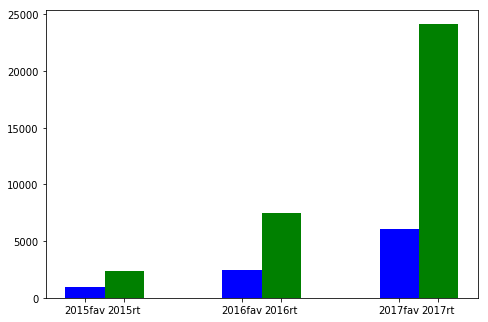

In [113]:
data = [[favorites_mean_2015, favorites_mean_2016, favorites_mean_2017], [retweets_mean_2015, retweets_mean_2016, retweets_mean_2017]]

X = np.arange(3)
print(X)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(X + 0.00, data[1], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[0], color = 'g', width = 0.25)
lst = [0, 0.25, 1, 1.25, 2, 2.25]

X = np.array(lst)

plt.xticks(X, ['2015fav', '2015rt', '2016fav', '2016rt', '2017fav', '2017rt'])